In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 13]

cmap = 'bwr' #'coolwarm'

# Convolutional Neural Networks

### CNNs are Neural Networks typically used for images processing or classification

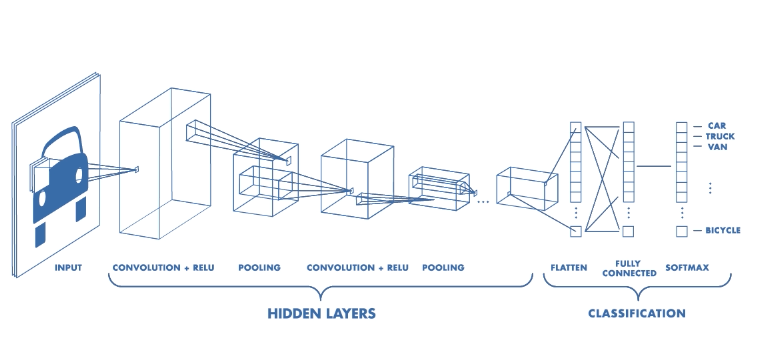

Architecture of a CNN. — Source: https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html

### Various concepts are shown here, which may be a little obscure:
    - 'Hidden' layers
    - Convolution layer
    - ReLU
    - Pooling
    - 'Fully Connected'
    - SoftMax
    
Let's go over these...

## but first, let's look at a simple neural network

### see Simple Neural Network with PyTorch

# Let's continue with Convolutional Neural Network

## Convolution

See the Convolution tutorial to understand kernel convolutions

In a neural network, the **kernel**, is the matrix of weights that are being trained.
A kernel, in essence, learns to recognize a specific 'feature' (edges, orientation of the edge, etc...)

A Convolution layer in a Convolutional Neural Network, learns to recognize many features at once, by convoluting the input image with many kernels at once.

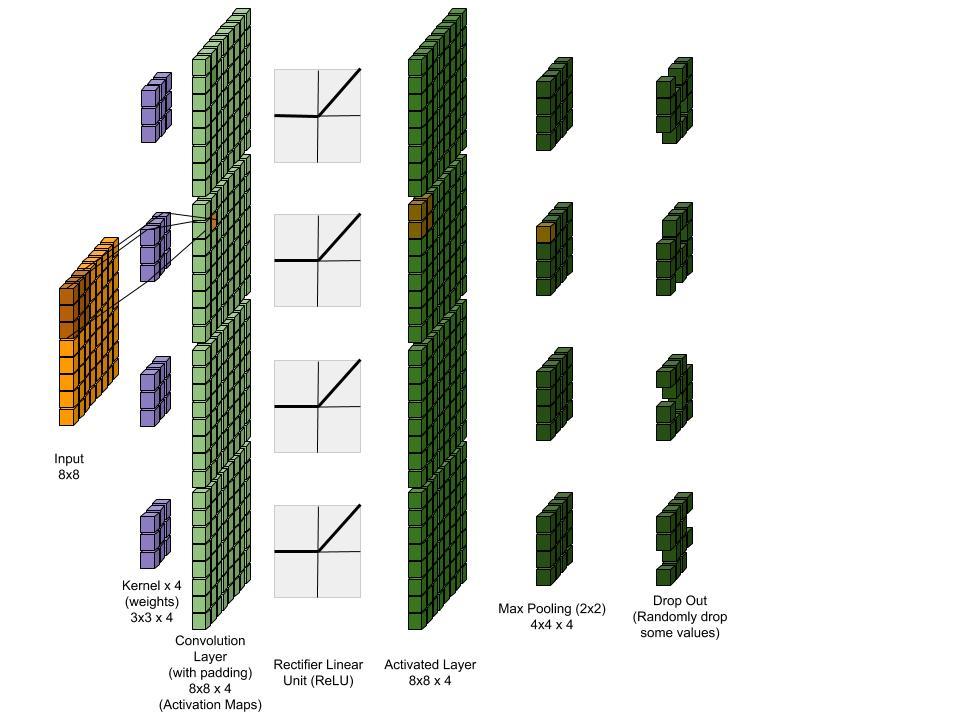

We'll see in the StrideNet model we will build later that each Conv2d layer implements more and more kernels (32, 64, 128...) each learning to recognize more and more abstract features.

The first layers learn to recognize details, then deeper layer build on those layers while polling pixels together, learning to recognize more general (abstract) features from the previous layers)

In [2]:
# let's get our Zebra picture
img1 = plt.imread('zebra.jpg')
# grayscale + normalize
gray1 = np.mean(img1[...,:3], -1) / 255.0

In [3]:
gray1

array([[0.7751634 , 0.76339869, 0.76732026, ..., 0.76862745, 0.7254902 ,
        0.66405229],
       [0.79084967, 0.76732026, 0.74771242, ..., 0.71764706, 0.73333333,
        0.70326797],
       [0.70457516, 0.76339869, 0.79084967, ..., 0.72156863, 0.7372549 ,
        0.7503268 ],
       ...,
       [0.69150327, 0.74640523, 0.64052288, ..., 0.59738562, 0.71111111,
        0.61960784],
       [0.71503268, 0.53856209, 0.65620915, ..., 0.62352941, 0.68627451,
        0.58823529],
       [0.7620915 , 0.71895425, 0.70326797, ..., 0.61960784, 0.69803922,
        0.6       ]])

In [4]:
# convert to Tensor object for PyTorch
gray1 = torch.Tensor(np.array(gray1, dtype=float))

In [5]:
h, w = gray1.size()
print(gray1.size())

torch.Size([141, 250])


In [10]:
# simple Convolution2D layer with 1 layer as input (gray scale) and n layers as output (n kernels)
n = 5
model = nn.Conv2d(1, n, kernel_size=3, stride=1, padding=1)

In [11]:
# apply Conv2d to our zebra image (reshape to fit the required format)
output = model(gray1.reshape(1, 1, h, w))
output.size()

torch.Size([1, 5, 141, 250])

In [12]:
# the output has 3 layers. Extract as numpy array and squeeze to recover a 3D array
o = output.detach().numpy().squeeze()

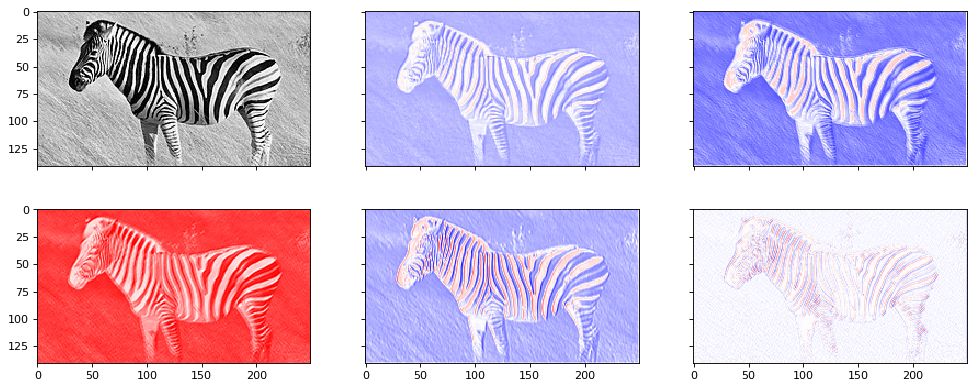

In [13]:
# plot the 3 layers along with the original image
m = n + 1 # total nb of images
c = min(m, 3) # nb columns
r = int(math.ceil(m / c)) # nb rows
index = np.array(range(0, r * c)).reshape(r, -1)
fig, ax = plt.subplots(nrows=r, ncols=c, figsize=(15, 3 * r), dpi=80, sharex=True, sharey=True)
ax[0, 0].imshow(gray1, cmap='gray', vmin=0.0, vmax=1.0)
for id in range(1, m):
    ix = np.where(index==id)
    ax[ix[0][0], ix[1][0]].imshow(o[id - 1], cmap=cmap, vmin=-1.0, vmax=1.0)

In [14]:
o[0]

array([[ 0.05397921,  0.03359704,  0.03862353, ...,  0.03670336,
         0.02630245, -0.10133316],
       [-0.13855678, -0.3027282 , -0.30567065, ..., -0.27830264,
        -0.28139126, -0.34753993],
       [-0.14751996, -0.29587397, -0.2961706 , ..., -0.28810906,
        -0.2693132 , -0.3576121 ],
       ...,
       [-0.14748885, -0.2677198 , -0.3221008 , ..., -0.21851271,
        -0.21254778, -0.2362721 ],
       [-0.14370611, -0.26106203, -0.26810923, ..., -0.21498495,
        -0.2623482 , -0.307344  ],
       [-0.1262399 , -0.28833672, -0.26972753, ..., -0.25971013,
        -0.28289238, -0.24723783]], dtype=float32)

### Note: if you re-run the code, you'll see different results, because the kernels are initialized randomly each time you create the model

In [15]:
# let's look at the kernel weights
[p for p in model.parameters()]

[Parameter containing:
 tensor([[[[-0.1750, -0.1651, -0.0985],
           [-0.0743, -0.0660,  0.0468],
           [ 0.0455, -0.1400,  0.1546]]],
 
 
         [[[-0.0862, -0.2986, -0.1660],
           [ 0.0736,  0.2053, -0.3215],
           [-0.2125, -0.0230, -0.1328]]],
 
 
         [[[-0.0764,  0.1185,  0.2799],
           [ 0.1818,  0.1848,  0.1642],
           [ 0.3120, -0.1469, -0.1243]]],
 
 
         [[[ 0.1486, -0.2808, -0.0234],
           [ 0.1373, -0.3062, -0.1342],
           [ 0.1898, -0.2537, -0.1420]]],
 
 
         [[[ 0.2240, -0.1094, -0.0133],
           [ 0.1412, -0.2738,  0.0840],
           [-0.3116,  0.0996,  0.0996]]]], requires_grad=True),
 Parameter containing:
 tensor([0.0614, 0.2199, 0.0995, 0.1781, 0.0150], requires_grad=True)]

## Activation Layer (ReLU)

See the info on activation layer

In [16]:
model2 = nn.ReLU()

In [17]:
output2 = model2(output)

In [18]:
o2 = output2.detach().numpy().squeeze()

In [19]:
# # plot the 3 layers along with the original image
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
# ax[0,0].imshow(gray1, cmap='gray', vmin=0.0, vmax=1.0)
# layer = ax[0,1].imshow(o2[0], cmap='seismic', vmin=-1.0, vmax=1.0)
# ax[1,0].imshow(o2[1], cmap='seismic', vmin=-1.0, vmax=1.0)
# ax[1,1].imshow(o2[2], cmap='seismic', vmin=-1.0, vmax=1.0)
# fig.colorbar(layer, ax=ax.ravel().tolist(), shrink=0.5)

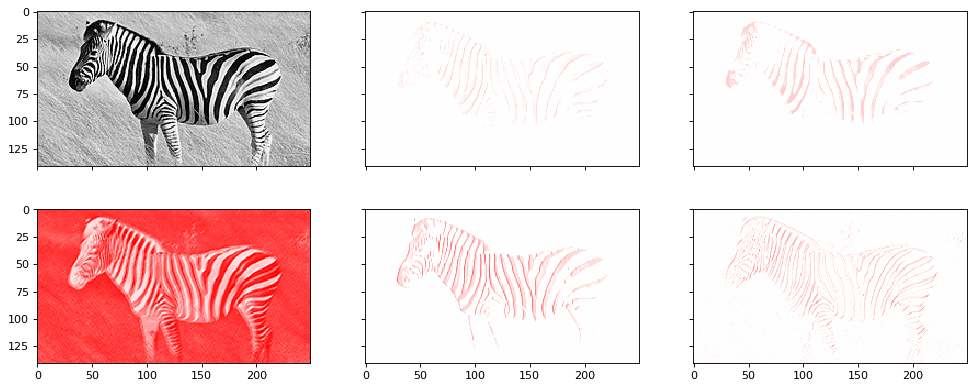

In [20]:
fig, ax = plt.subplots(nrows=r, ncols=c, figsize=(15, 3 * r), dpi=80, sharex=True, sharey=True)
ax[0, 0].imshow(gray1, cmap='gray', vmin=0.0, vmax=1.0)
for id in range(1, m):
    ix = np.where(index==id)
    ax[ix[0][0], ix[1][0]].imshow(o2[id - 1], cmap=cmap, vmin=-1.0, vmax=1.0)

## Pooling layer


As the name suggests, it's a transformaton that pools pixels together to reduce the dimension of the layer

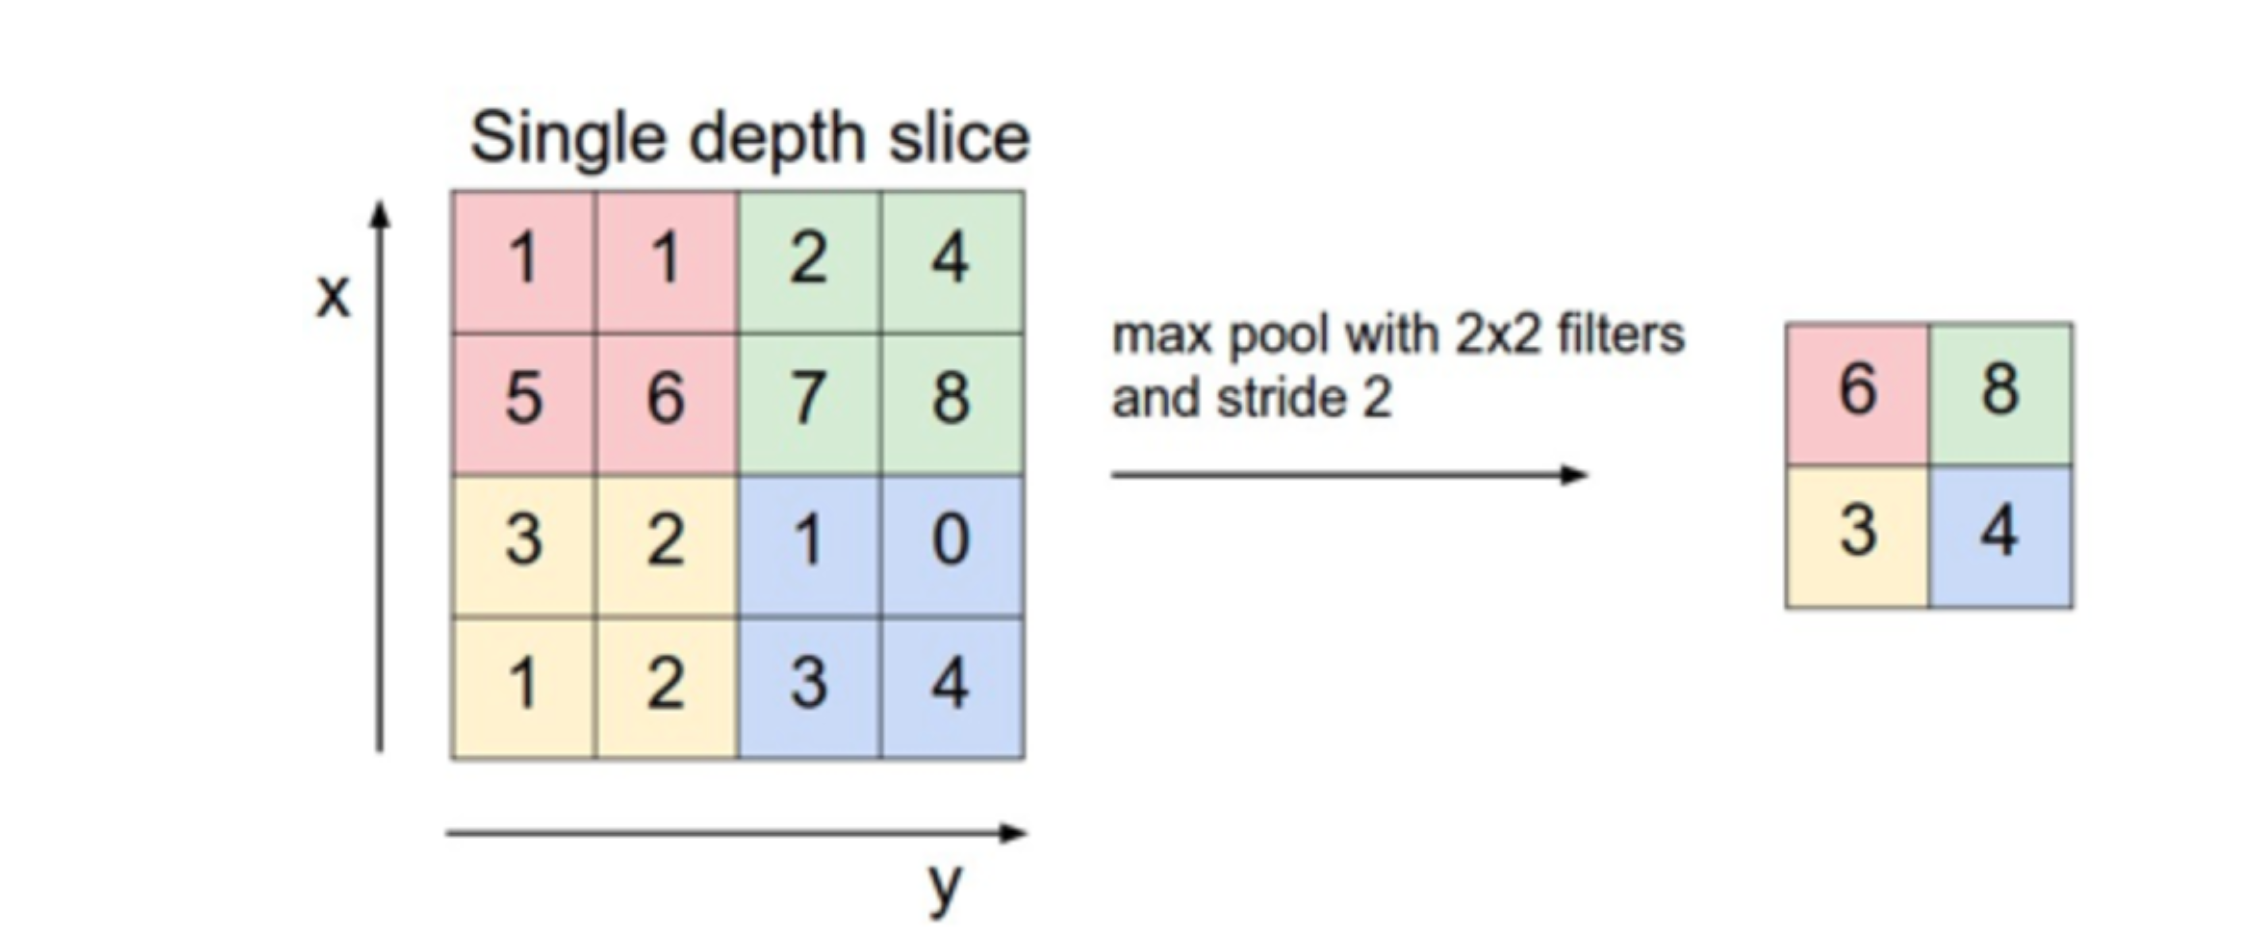

Max pooling takes the largest values. — Source: http://cs231n.github.io/convolutional-networks/

In [21]:
# a single MaxPool2d layer model
model3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

In [22]:
h, w = gray1.size()
print(gray1.size())

torch.Size([141, 250])


In [23]:
# run the image through the model
output3 = model3(gray1.reshape(1, h, w))

In [24]:
output3.size()

torch.Size([1, 70, 125])

In [25]:
# get output in numpy format and remove the extra dimension
npo3 = output3.detach().numpy().squeeze()

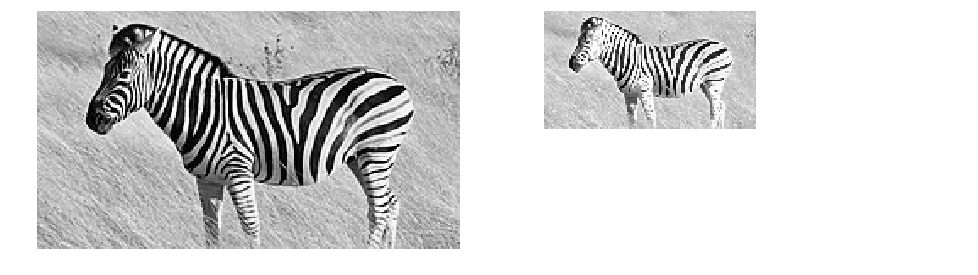

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
ax[0].axis('off')
ax[1].axis('off')
ax[1].imshow(npo3, cmap='gray')
ax[0].imshow(gray1, cmap='gray')

In [27]:
# let's look at input vs output
# a 4x4 area in input image
gray1[:4,:4]

tensor([[0.7752, 0.7634, 0.7673, 0.7869],
        [0.7908, 0.7673, 0.7477, 0.7595],
        [0.7046, 0.7634, 0.7908, 0.7595],
        [0.7477, 0.7281, 0.7438, 0.7712]])

In [28]:
# the 2x2 area generated
npo3[:2,:2]

array([[0.7908497, 0.7869281],
       [0.7633987, 0.7908497]], dtype=float32)

In [29]:
# the first value of the output is the max of the 2x2 top left quadrant on the input image, etc...

## DropOut layer

#### The dropout layers just drop random pixels of the input, at a ratio defined as a parameter

In [34]:
model4 = nn.Dropout2d(p=0.25)

In [35]:
output4 = model4(output3)

In [36]:
npo4 = output4.detach().numpy().squeeze()

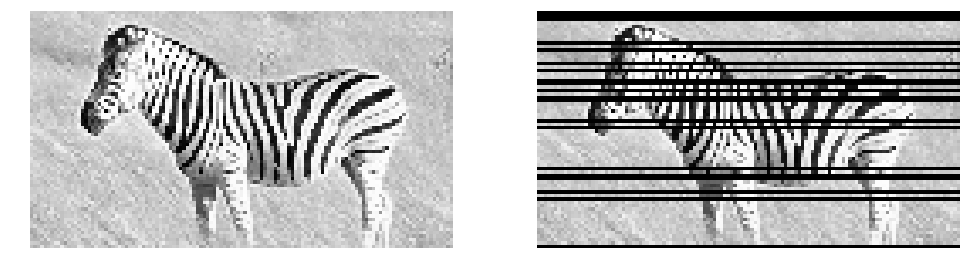

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].axis('off')
ax[1].axis('off')
ax[1].imshow(npo4, cmap='gray')
ax[0].imshow(npo3, cmap='gray')

#### This process happens for each image in the batch, so that there is more randomness in the input data
At each training pass, the pixels that are removed by the dropout layer are changing, so that the same image viewed multiple times through the model will propagate differently.

# Classification

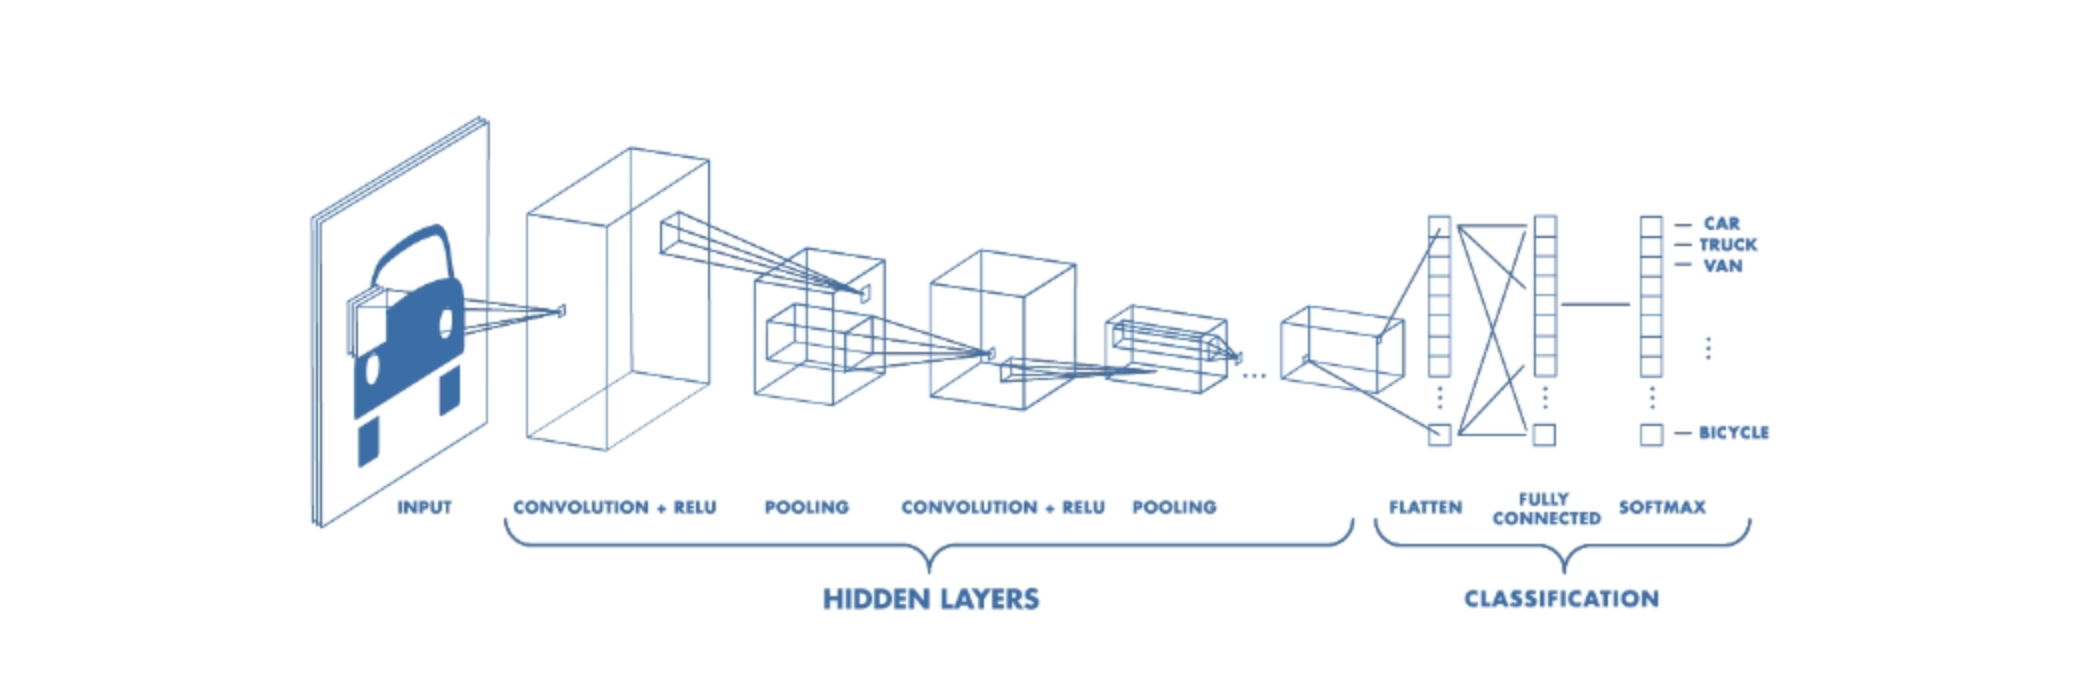

## Flatten layer

#### The purpose of the Flatten layer is to reshape the image-like data (2D tensors) into a vector (1D), by concatenating the various dimensions into one dimension. That does not involve any transformation except for the shape of the data.

## Fully Connected layer: classification

#### The fully connected layer reduces dimension of the flattened input vector to match the number of classes. It is a simple linear model. It is said to be 'fully connected' because it connects the model so far (hidden layers with variable sizes that do not match input of output) to the classes (i.e. the output dimension of the network)

#### We're no longer into 'hidden layers' but into a classifier module.

## Softmax: prediction output

#### The Softmax layer is one (but likely the most popular) of the many options for classification. It normalized the fully connected layer output into a prediction per class (i.e. normalizes to [0, 1])

Softmax uses multi-logistic regression to fit the network vector with values in the range [-x, +x] to a vector where each value is in the range [0, 1]

The final output is a vector where each value is a prediction for the corresponding class.
The index of the maximum prediction can be matched to the index of the image class.